In [1]:
import pandas as pd
pd.set_option("display.max_columns", 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

Matplotlib created a temporary cache directory at /scratch/naotok/3243018/matplotlib-4uih8t8u because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
Emx_df = pd.read_csv(

    "/rhome/naotok/bigdata/Upf2_paper/Upf2KO_Emx_cortex.csv"

)

Emx_df = Emx_df[[x for x in Emx_df.columns if x.startswith("TPM_")]]
Emx_df.columns = ["KO_1", "KO_2", "Ctrl_1", "Ctrl_2"]
Emx_df = Emx_df.T
Emx_df = Emx_df.T[~(Emx_df.sum() == 0)]

In [3]:
# Take log10
Emx_log_df = np.log10(Emx_df+1)

In [4]:
Emx_group_col = pd.Series([
    "KO", "KO",
    "WT", "WT"
])
Emx_group_lut = dict(zip(Emx_group_col.unique(), sns.color_palette("tab10")[0:2][::-1]))
Emx_group_colors = Emx_group_col.map(Emx_group_lut)

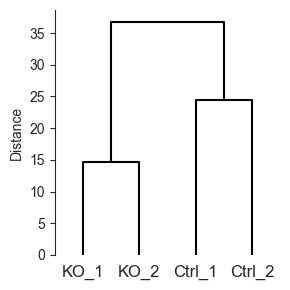

In [5]:
# Only dendrogram
Z = linkage(Emx_log_df.T, 'ward')
hierarchy.set_link_color_palette(["black"])
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot()
dn = dendrogram(Z, above_threshold_color = 'black', labels = Emx_log_df.columns)
ax.set(ylabel = "Distance")
sns.despine(bottom = True)
plt.tight_layout()

plt.savefig("/rhome/naotok/Upf2_paper/figure/Emx_Upf2_KO_RNAseq_TPM_dendrogram.png", dpi = 1000)